<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data</h1>
</center>

## **Deskripsi**

Menggunakan clustering sebagai salah satu metode feature engineering

## **Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from utils.preprocessing import (
    FeatureOutliersHandling,
    FeatureImputer,
    FeatureResampling,
    FeatureLabelEncoder,
    FeatureDiscretizer,
    FeatureRareCategoriesGrouping,
    FeaturePolynomialAdder,
    FeaturePowerTransformer,
    FeatureGroupingNumeric,
    FeatureDimensionReducer,
    FeatureEncoder,
    FeatureScaler,
)

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
data_path = './data'

**Train**

In [3]:
# TODO: define initial dataframes
initial_df = pd.read_csv(f'{data_path}/EV_data.csv')
# -----------------------------------

initial_df

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3375,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2375,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2500,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.3375,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0


**Test**

In [4]:
# # TODO: define test dataframe
# test_features_df = pd.read_csv(f'{data_path}/test_features.csv')

# submisssion_ids = test_features_df['ID']

# test_features_df = test_features_df.drop(columns=['ID'])
# # -------------------------------------

# test_features_df = test_features_df.reindex(sorted(test_features_df.columns), axis=1)

# test_features_df

**Define Target and Features**

In [5]:
# TODO: define which columns are target labels
label = 'label'
# -----------------------------------
# TODO: define which columns are categorical and which are numerical features
categorical_features = ['id']

# get all columns with float64 and int64 data types
numerical_features = initial_df.select_dtypes(include=['float64']).columns
# -----------------------------------


## **Data Preparation**

### **Drop Unnecessary Columns [TENTATIVE]**

In [6]:
# TODO: define columns to drop
columns_to_drop = ['label', 'read_date']
# -----------------------------------

categorical_features = [col for col in categorical_features if col not in columns_to_drop]
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

### **Drop Duplicates**

In [7]:
print('Row count for initial data before removing duplicates:', len(initial_df))
initial_df.drop_duplicates(inplace=True)
print('Row count for initial data after removing duplicates:', len(initial_df))
initial_df.reset_index(drop=True, inplace=True) # Reset the index after dropping duplicates

Row count for initial data before removing duplicates: 4048
Row count for initial data after removing duplicates: 4048


In [8]:
initial_df = initial_df.drop(columns=columns_to_drop)
# test_features_df = test_features_df.drop(columns=columns_to_drop)

#### **Check Similarity Columns between Train and Test**

In [9]:
def is_same_cols(df1: pd.DataFrame, df2: pd.DataFrame, label: str):
    """
    Function to check if two DataFrames have the same columns, excluding the label column if it exists.
    
    Parameters:
    - df1: First DataFrame
    - df2: Second DataFrame
    - label: The name of the label column to exclude from the comparison (default is 'label').
    
    Returns:
    - Boolean value indicating whether the columns are the same, excluding the label column
    """
    # Exclude the label column if it exists in either DataFrame
    df1_cols = df1.columns.drop(label) if label in df1.columns else df1.columns
    df2_cols = df2.columns.drop(label) if label in df2.columns else df2.columns

    # Compare the remaining columns
    return df1_cols.equals(df2_cols)

In [10]:
# print('Initial and test features have the same columns:', is_same_cols(initial_df, test_features_df, label))

### **Grouping by ID**

In [11]:
grouped_df = initial_df.groupby(['id']).mean()

In [12]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   interval_1   88 non-null     float64
 1   interval_2   88 non-null     float64
 2   interval_3   88 non-null     float64
 3   interval_4   88 non-null     float64
 4   interval_5   88 non-null     float64
 5   interval_6   88 non-null     float64
 6   interval_7   88 non-null     float64
 7   interval_8   88 non-null     float64
 8   interval_9   88 non-null     float64
 9   interval_10  88 non-null     float64
 10  interval_11  88 non-null     float64
 11  interval_12  88 non-null     float64
 12  interval_13  88 non-null     float64
 13  interval_14  88 non-null     float64
 14  interval_15  88 non-null     float64
 15  interval_16  88 non-null     float64
 16  interval_17  88 non-null     float64
 17  interval_18  88 non-null     float64
 18  interval_19  88 non-null     float64
 19  interval_20  88

### **Clustering for feature engineering**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


# Kelas KMeans untuk melakukan clustering
class KMeans:
    def __init__(self, K=3, max_iters=100, random_state=42):
        self.K = K
        self.max_iters = max_iters
        self.random_state = random_state
        
        # List untuk menyimpan indeks sampel pada tiap cluster
        self.clusters = [[] for _ in range(self.K)]
        
        # List untuk menyimpan centroid (mean) dari tiap cluster
        self.centroids = []
        
        # Flag untuk mengecek apakah model sudah di-fit
        self.is_fitted = False

    def fit(self, X):
        """
        Melatih model KMeans dengan data training.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data training untuk fitting model
        
        Returns:
        --------
        self : object
            Returns self
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Inisialisasi centroid secara acak dari sampel dalam dataset
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples ke centroid terdekat
            self.clusters = self._create_clusters(self.centroids)
            
            # Hitung centroid baru berdasarkan cluster
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # Periksa konvergensi
            if self._is_converged(centroids_old, self.centroids):
                break
        
        self.is_fitted = True
        return self

    def predict(self, X):
        """
        Memprediksi cluster untuk data X.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data baru untuk diprediksi cluster-nya
            
        Returns:
        --------
        labels : array, shape (n_samples,)
            Label cluster untuk setiap data point
        """
        if not self.is_fitted:
            raise Exception("Model belum di-fit! Panggil fit() terlebih dahulu.")
            
        # Untuk setiap sample dalam X, tentukan centroid terdekat
        labels = np.empty(X.shape[0])
        for i, sample in enumerate(X):
            closest_centroid = self._closest_centroid(sample, self.centroids)
            labels[i] = closest_centroid
            
        return labels

    def fit_predict(self, X):
        """
        Melakukan fit model dan langsung memprediksi cluster untuk data training.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data training
            
        Returns:
        --------
        labels : array, shape (n_samples,)
            Label cluster untuk data training
        """
        self.fit(X)
        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            if len(cluster) > 0:  # Hindari division by zero
                cluster_mean = np.mean(self.X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
        return centroids

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

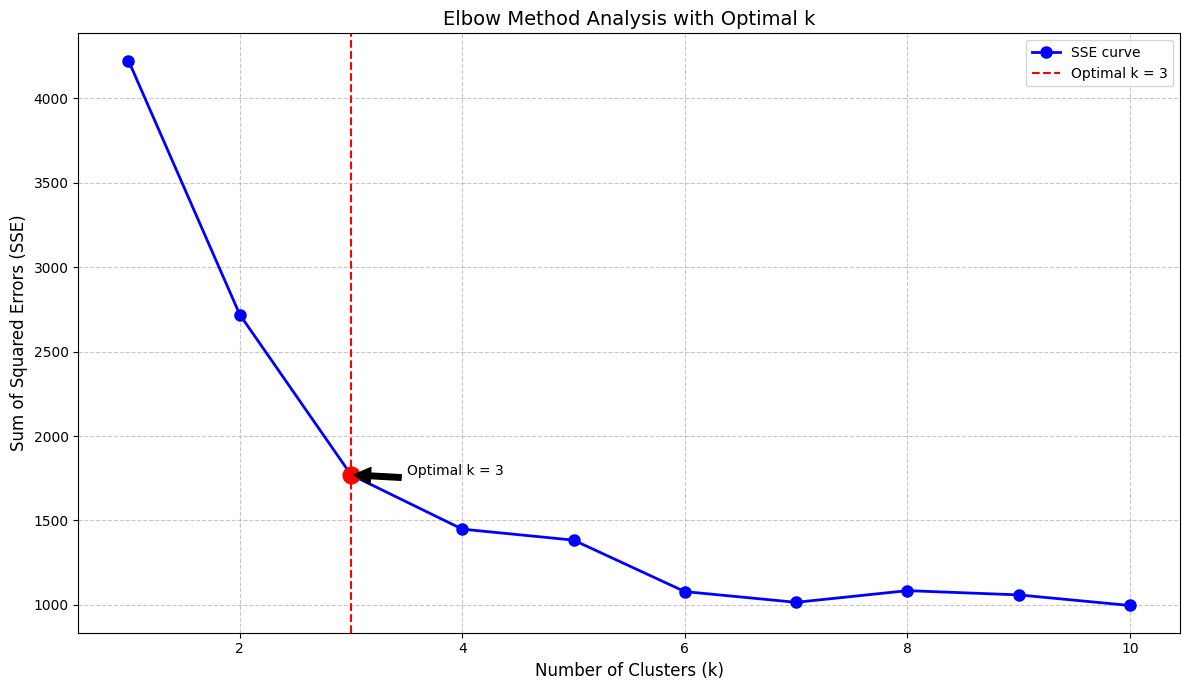

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist

def find_optimal_k(sse_values):
    """
    Find the optimal k using the elbow method by identifying the point of maximum curvature
    """
    # Calculate the differences and rate of change
    differences = np.diff(sse_values)
    differences_rate = np.diff(differences)
    
    # Find the elbow point (point of maximum curvature)
    elbow_index = np.argmax(np.abs(differences_rate)) + 2
    return elbow_index

def elbow_method(df, max_k=10):
    """
    Perform elbow method analysis and visualize results with optimal k highlighted
    """
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Calculate SSE for different values of k
    sse = []
    K = range(1, max_k+1)
    
    for k in K:
        kmeans = KMeans(K=k, max_iters=100)
        labels = kmeans.fit_predict(scaled_features)
        
        # Calculate SSE
        current_sse = 0
        for i, cluster in enumerate(kmeans.clusters):
            if len(cluster) > 0:  # Check if cluster is not empty
                cluster_points = scaled_features[cluster]
                centroid = kmeans.centroids[i]
                current_sse += np.sum((cluster_points - centroid) ** 2)
        
        sse.append(current_sse)
    
    # Find optimal k
    optimal_k = find_optimal_k(sse)
    
    # Create the visualization
    plt.figure(figsize=(12, 7))
    
    # Plot the elbow curve
    plt.plot(K, sse, 'bo-', linewidth=2, markersize=8, label='SSE curve')
    
    # Add vertical line at optimal k
    plt.axvline(x=optimal_k, color='red', linestyle='--', 
                label=f'Optimal k = {optimal_k}')
    
    # Highlight the optimal point
    plt.plot(optimal_k, sse[optimal_k-1], 'ro', markersize=12)
    
    # Customize the plot
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
    plt.title('Elbow Method Analysis with Optimal k', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    
    # Add text annotation for optimal k
    plt.annotate(f'Optimal k = {optimal_k}',
                xy=(optimal_k, sse[optimal_k-1]),
                xytext=(optimal_k+0.5, sse[optimal_k-1]),
                fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.tight_layout()
    plt.show()
    
    return sse, optimal_k

def analyze_clusters(df, optimal_k):
    """
    Perform clustering with the optimal k and return labeled data
    """
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df)
    
    kmeans = KMeans(K=optimal_k, max_iters=100)
    labels = kmeans.fit_predict(scaled_features)
    
    return labels, kmeans.centroids

# Usage example:
sse_values, optimal_k = elbow_method(grouped_df, max_k=10)
labels, centroids = analyze_clusters(grouped_df, optimal_k)

In [29]:
def apply_kmeans_clustering(df, n_clusters, test_size=0.2, random_state=42, n_components=2, numeric_features_pca=None):
    """
    Apply KMeans clustering to the DataFrame with train-test split, scaling and PCA
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the features
    n_clusters : int
        Number of clusters for KMeans
    test_size : float, optional (default=0.2)
        Proportion of the dataset to include in the test split
    random_state : int, optional (default=42)
        Random state for reproducibility
    n_components : int, optional (default=2)
        Number of components for PCA
    numeric_features_pca : list, optional
        List of numeric feature names to use for PCA. If None, all features will be used
        
    Returns:
    --------
    combined_df : pandas.DataFrame
        Original DataFrame with cluster assignments added
    centroids_df : pandas.DataFrame
        DataFrame containing the centroid values for each cluster
    kmeans : KMeans
        Fitted KMeans model
    """
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    
    # Reset index of input DataFrame to avoid any potential index issues
    df = df.reset_index(drop=True)
    
    # If numeric_features_pca not specified, use all columns
    if numeric_features_pca is None:
        numeric_features_pca = df.columns.tolist()
    
    # Create a copy of the input data
    X = df.copy()
    
    # Perform train-test split
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    
    # Reset indices after split
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    
    # Apply scaling
    scaler = FeatureScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply PCA
    reducer = FeatureDimensionReducer(
        method='pca',
        n_components=n_components,
        numeric_features_to_reduce=numeric_features_pca,
        column_names='interval_pca'
    )
    X_train_reduced = reducer.fit_transform(X_train_scaled)
    X_test_reduced = reducer.transform(X_test_scaled)
    
    # Print explained variance ratio
    print(f"Explained variance ratio for {n_components} components:\n", 
          reducer.get_variance_ratio())
    
    # Apply KMeans clustering on training data
    kmeans = KMeans(K=n_clusters, max_iters=100)
    train_cluster_labels = kmeans.fit(X_train_reduced)
    test_cluster_labels = kmeans.predict(X_test_reduced)
    
    # Add cluster assignments to original dataframes
    train_df_with_clusters = X_train.copy()
    test_df_with_clusters = X_test.copy()
    train_df_with_clusters['Cluster'] = train_cluster_labels
    test_df_with_clusters['Cluster'] = test_cluster_labels
    
    # Get cluster centroids in original feature space
    centroids_reduced = kmeans.centroids
    
    # Inverse transform centroids through PCA and scaling
    centroids_scaled = reducer.inverse_transform(centroids_reduced)
    centroid_values = scaler.inverse_transform(centroids_scaled)
    
    # Create centroids DataFrame
    centroids_df = pd.DataFrame(
        centroid_values,
        columns=df.columns,
        index=[f'Cluster_{i}' for i in range(n_clusters)]
    )
    
    # Add split information before concatenation
    train_df_with_clusters['Split'] = 'Train'
    test_df_with_clusters['Split'] = 'Test'
    
    # Concatenate with reset_index
    combined_df = pd.concat([train_df_with_clusters, test_df_with_clusters], ignore_index=True)
    
    return combined_df, centroids_df, kmeans

In [30]:
clustered_df, centroids, kmeans_model = apply_kmeans_clustering(
    df=grouped_df,
    n_clusters=3,
    n_components=3,
    numeric_features_pca=numerical_features
)

# # View results
# print("\nCluster Assignments by Split:")
# print(pd.crosstab(clustered_df['Split'], clustered_df['Cluster']))

# print("\nCluster Centroids:")
# print(centroids)

Normal features (StandardScaler): []
Non-normal features (MinMaxScaler): ['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5', 'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10', 'interval_11', 'interval_12', 'interval_13', 'interval_14', 'interval_15', 'interval_16', 'interval_17', 'interval_18', 'interval_19', 'interval_20', 'interval_21', 'interval_22', 'interval_23', 'interval_24', 'interval_25', 'interval_26', 'interval_27', 'interval_28', 'interval_29', 'interval_30', 'interval_31', 'interval_32', 'interval_33', 'interval_34', 'interval_35', 'interval_36', 'interval_37', 'interval_38', 'interval_39', 'interval_40', 'interval_41', 'interval_42', 'interval_43', 'interval_44', 'interval_45', 'interval_46', 'interval_47', 'interval_48']
Explained variance ratio for 3 components:
 [0.62697238 0.16669481 0.0758497 ]


KeyError: np.int64(22)

In [ ]:
# # n_clusters = 3  # Replace with your optimal number from the elbow method
# df_clustered, centroids, model = apply_kmeans_clustering(grouped_df, n_clusters)

In [ ]:
clustered_df

In [ ]:
#Save clustered data to csv
clustered_df.to_csv(f'{data_path}/clustered_data.csv')

In [ ]:
df1 = pd.read_csv(f'{data_path}/EV_data.csv')
df2 = pd.read_csv(f'{data_path}/clustered_data.csv')

merged_df = df1.merge(
    df2[['id', 'cluster']], 
    on='id', 
    how='left'
)

In [ ]:
merged_df.to_csv(f'{data_path}/merged_data.csv')

#### Analsis hasil cluster

In [ ]:
import seaborn as sns
def plot_cluster_distribution(df, title="Distribution of Clusters"):
    plt.figure(figsize=(10, 6))
    # Get cluster counts
    cluster_counts = df['cluster'].value_counts().sort_index()
    
    # Create bar plot with explicit positions
    bars = plt.bar(
        range(len(cluster_counts)),
        cluster_counts,
        width=0.6,  # Make bars thinner
        color='steelblue'
    )
    
    # Customize the plot
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    
    # Set x-axis ticks and labels
    plt.xticks(range(len(cluster_counts)), ['0', '1', '2'])
    
    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    
    # Add grid
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis to start at 0
    plt.ylim(0, max(cluster_counts) * 1.1)
    
    # Add some padding to x-axis
    plt.xlim(-0.5, len(cluster_counts) - 0.5)
    
    plt.show()

In [ ]:
plot_cluster_distribution(merged_df, title="Hasil Clustering K-Means")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_cluster_characteristics(df, feature_columns, cluster_col='cluster'):
    """
    Analyze characteristics for each cluster with formatted output
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing features and cluster assignments
    feature_columns : list
        List of feature column names to analyze
    cluster_col : str
        Name of the cluster column
    """
    # Calculate size of each cluster
    cluster_sizes = df[cluster_col].value_counts().sort_index()
    cluster_percentages = (cluster_sizes / len(df) * 100).round(2)
    
    # Create a dictionary to store cluster statistics
    cluster_summaries = {}
    
    # Calculate statistics for each cluster separately
    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster][feature_columns]
        
        print(f"\nCluster {cluster}: ")
        print(f"Size: {cluster_sizes[cluster]} samples ({cluster_percentages[cluster]}%)")
        print("mean =")
        print(cluster_data.mean().round(2))
        print("\nmin =")
        print(cluster_data.min().round(2))
        print("\nmax =")
        print(cluster_data.max().round(2))
        print("\nmedian =")
        print(cluster_data.median().round(2))
        print("\nstd =")
        print(cluster_data.std().round(2))
        print("-" * 50)
        
        # Store statistics in dictionary if needed for later use
        cluster_summaries[cluster] = {
            'mean': cluster_data.mean(),
            'min': cluster_data.min(),
            'max': cluster_data.max(),
            'median': cluster_data.median(),
            'std': cluster_data.std()
        }
    
    return cluster_summaries

def plot_feature_distributions(df, feature_columns, cluster_col='cluster'):
    n_features = len(feature_columns)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 5*n_features))
    
    if n_features == 1:
        axes = [axes]
    
    for ax, feature in zip(axes, feature_columns):
        sns.boxplot(data=df, x=cluster_col, y=feature, ax=ax)
        ax.set_title(f'Distribution of {feature} across clusters')
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(df, feature_columns, cluster_col='cluster'):
    # Calculate mean values for each feature in each cluster
    cluster_means = df.groupby(cluster_col)[feature_columns].mean()
    
    # Calculate global means
    global_means = df[feature_columns].mean()
    
    # Calculate relative differences from global mean
    relative_importance = (cluster_means - global_means) / global_means * 100
    
    plt.figure(figsize=(24, 16))
    sns.heatmap(relative_importance, 
                annot=True, 
                fmt='.1f', 
                cmap='RdYlBu_r',
                center=0,
                cbar_kws={'label': 'Relative difference from global mean (%)'})
    plt.title('Feature Importance by Cluster')
    plt.ylabel('Cluster')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

def get_cluster_profiles(df, feature_columns, cluster_col='cluster', n_top_features=3):
    cluster_means = df.groupby(cluster_col)[feature_columns].mean()
    global_means = df[feature_columns].mean()
    relative_diff = (cluster_means - global_means) / global_means * 100
    
    profiles = {}
    for cluster in df[cluster_col].unique():
        # Get top distinguishing features
        cluster_diff = relative_diff.loc[cluster].sort_values(ascending=False)
        top_high = cluster_diff.head(n_top_features)
        top_low = cluster_diff.tail(n_top_features)
        
        profile = f"Cluster {cluster} Profile:\n"
        profile += f"Size: {len(df[df[cluster_col] == cluster])} samples\n"
        profile += "Distinguished by (percentage above average):\n"
        
        # Add high features
        profile += "Highest by consumption:\n"
        for feat, diff in top_high.items():
            profile += f"- {feat}: {diff:.1f}%\n"
        
        # Add low features
        profile += "\nLowest by consumption:\n"
        for feat, diff in top_low.items():
            profile += f"- {feat}: {diff:.1f}%\n"
            
        profiles[cluster] = profile
    
    return profiles

In [ ]:
# Asumsikan kita memiliki feature_columns yang berisi nama-nama kolom fitur
feature_columns = [col for col in merged_df.columns if col not in ['cluster', 'read_date', 'id', 'label']]

# 1. Analisis statistik dasar
cluster_stats = analyze_cluster_characteristics(merged_df, feature_columns)
print("\nStatistik detail per cluster:")
print(cluster_stats)

# # 2. Visualisasi distribusi fitur
# plot_feature_distributions(merged_df, feature_columns)

# 3. Visualisasi pentingnya fitur
plot_feature_importance(merged_df, feature_columns)

# 4. Dapatkan profil detail setiap cluster
cluster_profiles = get_cluster_profiles(merged_df, feature_columns)
for cluster, profile in cluster_profiles.items():
    print("\n" + profile)

## Modelling

### Load data merged_data

In [ ]:
merged_df

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# drop read date
merged_df = merged_df.drop(columns=['read_date'])

X = merged_df.drop(columns=[label])
y = merged_df[label]

# X_test = test_features_df
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data:", len(merged_df))
print("Jumlah data train:", len(X_train))
print("Jumlah data validasi:", len(X_val))

### Preparation seperti supervised

#### Scaler

In [ ]:
scaler = FeatureScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# # X_test = scaler.transform(X_test)

normal_features, non_normal_features = scaler.get_scaler_columns()

print("Normal Features:", normal_features)
print("Non-Normal Features:", non_normal_features)

### Logistic Regression

In [ ]:
import numpy as np
# Define fungsi sigmoid
def sigmoid(x):
    # Merubah input menjadi probabilitas di range (0,1)
    return 1/(1+np.exp(-x))

# Define Kelas untuk LogReg
class LogisticRegression():
    # Init konstruktor dengan params learning rate dan jumlah iterasi
    def __init__(self, lr=0.001, n_iters=200):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # fit dengan data train 
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Loop untuk update parameter sebanyak n_iters
        for _ in range(self.n_iters):
            # hitung linear prediction
            linear_pred = np.dot(X, self.weights) + self.bias
            # masukkan ke sigmoid
            predictions = sigmoid(linear_pred)

           # cari gradien untuk weight dan bias (optimization)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            # update weight dan bias
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    # prediksi data test
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # jika probabilitas > 0.5, maka kelas 1, jika tidak kelas 0
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_val, y_pred))